# Feature Engineering

In [7]:
import sys
import os
sys.path.append('../scripts')

from data_loader import *
from feature_engineering import *
from EDA import *

## Load Dataset

In [8]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## Aggregated  (RFMS) & Time Features

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [9]:
aggregated_df = create_aggregate_features(cleaned_df)
aggregated_df

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,TotalDebits,TotalCredits,DebitCount,CreditCount,TransactionVolatility,MonetaryAmount,NetCashFlow,DebitCreditRatio
2,CustomerId_1001,0,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,25200.0,-5200.0,3.0,2.0,6558.963333,30400.0,20000.0,4.846154
3,CustomerId_1002,63,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,4500.0,-275.0,5.0,6.0,560.498966,4775.0,4225.0,16.363636
4,CustomerId_1003,0,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,26000.0,-6000.0,4.0,2.0,6030.478146,32000.0,20000.0,4.333333
6,CustomerId_1005,0,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,55000.0,-6200.0,6.0,3.0,5983.681513,61200.0,48800.0,8.870968
11,CustomerId_1010,12,7,26335.0,3762.142857,4971.798817,11.428571,15.571429,8.857143,2018.285714,28000.0,-1665.0,4.0,3.0,4971.798817,29665.0,26335.0,16.816817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,CustomerId_992,0,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,26000.0,-6000.0,4.0,2.0,6088.240030,32000.0,20000.0,4.333333
3719,CustomerId_993,0,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,26000.0,-6000.0,3.0,2.0,6745.368782,32000.0,20000.0,4.333333
3720,CustomerId_994,88,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,578000.0,-34127.0,61.0,40.0,14800.656784,612127.0,543873.0,16.936736
3721,CustomerId_996,0,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,145000.0,-6000.0,15.0,2.0,4433.329648,151000.0,139000.0,24.166667


In [10]:
aggregated_df.isna().sum()

CustomerId               0
Recency                  0
Frequency                0
Monetary                 0
MeanAmount               0
StdAmount                0
AvgTransactionHour       0
AvgTransactionDay        0
AvgTransactionMonth      0
AvgTransactionYear       0
TotalDebits              0
TotalCredits             0
DebitCount               0
CreditCount              0
TransactionVolatility    0
MonetaryAmount           0
NetCashFlow              0
DebitCreditRatio         0
dtype: int64

## Encode Categorical Variables

In [11]:
encoded_df = encode_categorical_variables(aggregated_df)
encoded_df.head()

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,TotalDebits,TotalCredits,DebitCount,CreditCount,TransactionVolatility,MonetaryAmount,NetCashFlow,DebitCreditRatio
2,0,0,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,25200.0,-5200.0,3.0,2.0,6558.963333,30400.0,20000.0,4.846154
3,1,63,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,4500.0,-275.0,5.0,6.0,560.498966,4775.0,4225.0,16.363636
4,2,0,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,26000.0,-6000.0,4.0,2.0,6030.478146,32000.0,20000.0,4.333333
6,3,0,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,55000.0,-6200.0,6.0,3.0,5983.681513,61200.0,48800.0,8.870968
11,4,12,7,26335.0,3762.142857,4971.798817,11.428571,15.571429,8.857143,2018.285714,28000.0,-1665.0,4.0,3.0,4971.798817,29665.0,26335.0,16.816817


## Visualizing Transactions in the RFMS space
#### To establish a boundary where users are classified as high and low RFMS scores.

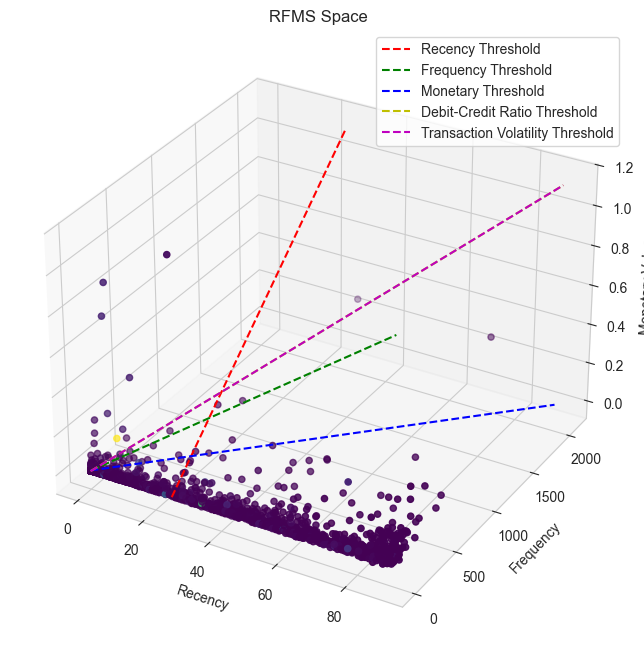

In [12]:
r_threshold, f_threshold, m_threshold, dc_threshold, tv_threshold = visualize_rfms_space(encoded_df)

In [13]:
r_threshold

np.float64(25.0)

In [14]:
f_threshold

np.float64(13.0)

In [15]:
m_threshold

np.float64(39000.0)

In [16]:
dc_threshold

np.float64(12.780542292657543)

In [17]:
tv_threshold

np.float64(5696.815355779601)

## Classifiy users based on RFM Thresholds

In [18]:
classified_df = classify_users_by_rfms(encoded_df, r_threshold, f_threshold, m_threshold, dc_threshold, tv_threshold)
classified_df.tail()

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,TotalDebits,TotalCredits,DebitCount,CreditCount,TransactionVolatility,MonetaryAmount,NetCashFlow,DebitCreditRatio,Classification,is_high_risk
3718,2635,0,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,26000.0,-6000.0,4.0,2.0,6088.240030,32000.0,20000.0,4.333333,High-risk,1
3719,2636,0,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,26000.0,-6000.0,3.0,2.0,6745.368782,32000.0,20000.0,4.333333,High-risk,1
3720,2637,88,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,578000.0,-34127.0,61.0,40.0,14800.656784,612127.0,543873.0,16.936736,High-risk,1
3721,2638,0,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,145000.0,-6000.0,15.0,2.0,4433.329648,151000.0,139000.0,24.166667,Low-risk,0
3722,2639,25,22,100000.0,4545.454545,6775.145563,13.136364,15.954545,1.363636,2019.000000,131500.0,-31500.0,14.0,8.0,6775.145563,163000.0,100000.0,4.174603,Low-risk,0


### Low-risk vs High-risk users distribution

In [19]:
(classified_df['Classification']=='High-risk').sum()

np.int64(1706)

In [20]:
(classified_df['Classification']=='Low-risk').sum()

np.int64(934)

In [21]:
classified_df.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio', 'Classification',
       'is_high_risk'],
      dtype='object')

## Perform Weight of Evidence (WoE) binning 

In [22]:
filtered_df = classified_df.drop(['Classification'], axis=1)
features_to_bin = ['Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio']
target = 'is_high_risk'


df_with_woe = calculate_woe_and_bin_features(filtered_df, features_to_bin, target)
df_with_woe

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,...,AvgTransactionMonth_binned_WoE,AvgTransactionYear_binned_WoE,TotalDebits_binned_WoE,TotalCredits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE
2,0,0,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,...,0.516487,0.150993,0.881028,0.790982,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529
3,1,63,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,...,0.516487,0.150993,-1.329867,-0.304798,0.269409,-0.324364,-0.777116,-1.321256,-1.236489,1.396472
4,2,0,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,...,-0.312538,-0.463556,0.881028,0.790982,0.269409,0.066257,-0.233333,1.020706,0.827036,0.340529
6,3,0,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,...,-0.163708,0.150993,0.834538,0.266608,0.269409,0.366307,-0.233333,0.665003,0.537004,-0.931115
11,4,12,7,26335.0,3762.142857,4971.798817,11.428571,15.571429,8.857143,2018.285714,...,0.516487,0.150993,0.881028,-0.473464,0.269409,0.366307,-0.233333,1.020706,0.537004,1.396472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,2635,0,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,...,-0.312538,-0.463556,0.881028,0.790982,0.269409,0.066257,-0.233333,1.020706,0.827036,0.340529
3719,2636,0,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,...,-0.617582,-0.463556,0.881028,0.790982,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529
3720,2637,88,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,...,0.790982,0.786220,0.321829,-0.115775,0.102146,0.208500,0.653989,0.303278,0.303278,1.396472
3721,2638,0,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,...,-0.163708,0.150993,-0.335709,0.790982,-0.099801,0.066257,-0.233333,-0.297049,0.303278,1.396472


In [23]:
cols = df_with_woe.columns.tolist()
cols.remove('is_high_risk')
cols.append('is_high_risk')

# Reorder the columns
df_with_woe = df_with_woe[cols]
df_with_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 2 to 3722
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerId                        2640 non-null   int64  
 1   Recency                           2640 non-null   int64  
 2   Frequency                         2640 non-null   int64  
 3   Monetary                          2640 non-null   float64
 4   MeanAmount                        2640 non-null   float64
 5   StdAmount                         2640 non-null   float64
 6   AvgTransactionHour                2640 non-null   float64
 7   AvgTransactionDay                 2640 non-null   float64
 8   AvgTransactionMonth               2640 non-null   float64
 9   AvgTransactionYear                2640 non-null   float64
 10  TotalDebits                       2640 non-null   float64
 11  TotalCredits                      2640 non-null   float64
 12  DebitCount 

In [24]:
df_with_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 2 to 3722
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerId                        2640 non-null   int64  
 1   Recency                           2640 non-null   int64  
 2   Frequency                         2640 non-null   int64  
 3   Monetary                          2640 non-null   float64
 4   MeanAmount                        2640 non-null   float64
 5   StdAmount                         2640 non-null   float64
 6   AvgTransactionHour                2640 non-null   float64
 7   AvgTransactionDay                 2640 non-null   float64
 8   AvgTransactionMonth               2640 non-null   float64
 9   AvgTransactionYear                2640 non-null   float64
 10  TotalDebits                       2640 non-null   float64
 11  TotalCredits                      2640 non-null   float64
 12  DebitCount 

## Feature Selection

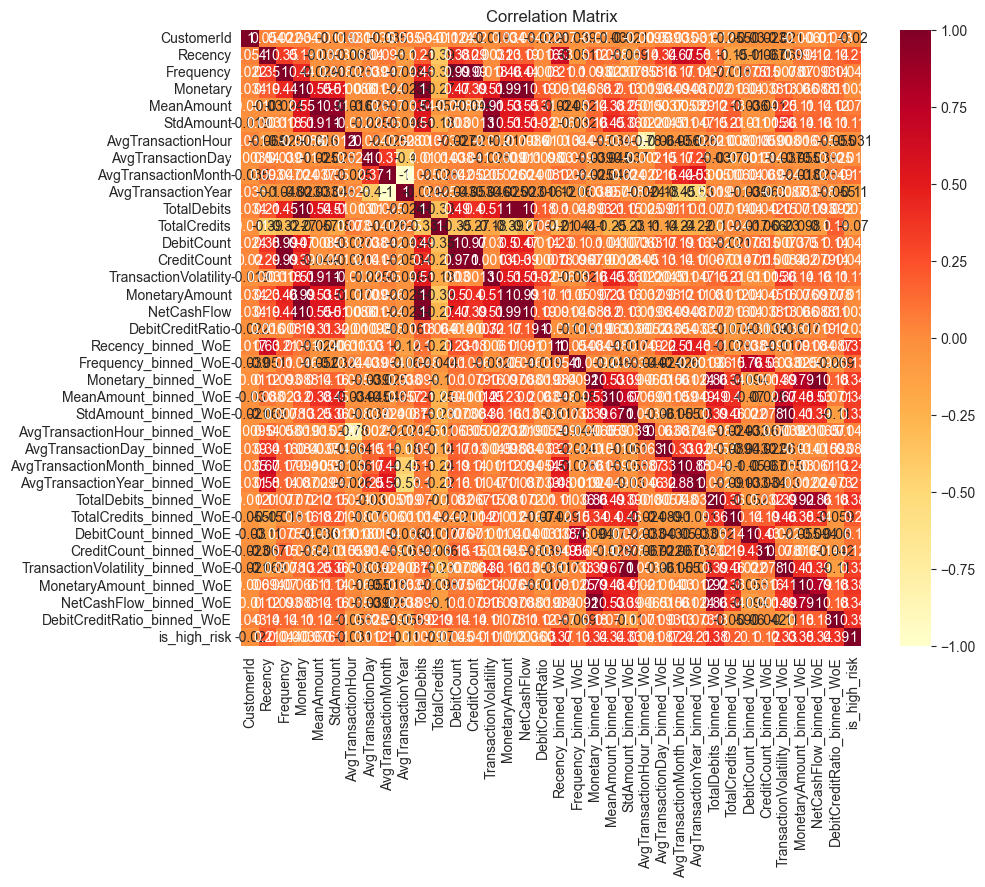

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Compute the correlation matrix
corr_matrix = df_with_woe.corr()

# heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [26]:
corr_df = df_with_woe.drop(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio'], axis=1)

## Recursive Feature Elimination

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

X = corr_df.drop('is_high_risk',axis=1)
y = corr_df['is_high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest model
rf = RandomForestRegressor()
rfe = RFE(rf, n_features_to_select=12)
rfe.fit(X_train, y_train)

feature_ranks = rfe.ranking_

selected_features = [feature for feature, rank in zip(X_train.columns, feature_ranks) if rank == 1]

In [28]:
selected_features 

['Recency_binned_WoE',
 'Frequency_binned_WoE',
 'Monetary_binned_WoE',
 'MeanAmount_binned_WoE',
 'StdAmount_binned_WoE',
 'TotalDebits_binned_WoE',
 'DebitCount_binned_WoE',
 'CreditCount_binned_WoE',
 'TransactionVolatility_binned_WoE',
 'MonetaryAmount_binned_WoE',
 'NetCashFlow_binned_WoE',
 'DebitCreditRatio_binned_WoE']

In [29]:
df_with_woe.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'TotalDebits',
       'TotalCredits', 'DebitCount', 'CreditCount', 'TransactionVolatility',
       'MonetaryAmount', 'NetCashFlow', 'DebitCreditRatio',
       'Recency_binned_WoE', 'Frequency_binned_WoE', 'Monetary_binned_WoE',
       'MeanAmount_binned_WoE', 'StdAmount_binned_WoE',
       'AvgTransactionHour_binned_WoE', 'AvgTransactionDay_binned_WoE',
       'AvgTransactionMonth_binned_WoE', 'AvgTransactionYear_binned_WoE',
       'TotalDebits_binned_WoE', 'TotalCredits_binned_WoE',
       'DebitCount_binned_WoE', 'CreditCount_binned_WoE',
       'TransactionVolatility_binned_WoE', 'MonetaryAmount_binned_WoE',
       'NetCashFlow_binned_WoE', 'DebitCreditRatio_binned_WoE',
       'is_high_risk'],
      dtype='object')

In [31]:
keep_features = ['Recency_binned_WoE',
                 'Frequency_binned_WoE',
                 'MeanAmount_binned_WoE',
                 'StdAmount_binned_WoE',
                 'AvgTransactionHour_binned_WoE',
                 'TotalDebits_binned_WoE',
                 'DebitCount_binned_WoE',
                 'CreditCount_binned_WoE',
                 'TransactionVolatility_binned_WoE',
                 'MonetaryAmount_binned_WoE',
                 'NetCashFlow_binned_WoE',
                 'DebitCreditRatio_binned_WoE',
                 'is_high_risk']

selected_df = df_with_woe[keep_features]

In [32]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 2 to 3722
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Recency_binned_WoE                2640 non-null   float64
 1   Frequency_binned_WoE              2640 non-null   float64
 2   MeanAmount_binned_WoE             2640 non-null   float64
 3   StdAmount_binned_WoE              2640 non-null   float64
 4   AvgTransactionHour_binned_WoE     2640 non-null   float64
 5   TotalDebits_binned_WoE            2640 non-null   float64
 6   DebitCount_binned_WoE             2640 non-null   float64
 7   CreditCount_binned_WoE            2640 non-null   float64
 8   TransactionVolatility_binned_WoE  2640 non-null   float64
 9   MonetaryAmount_binned_WoE         2640 non-null   float64
 10  NetCashFlow_binned_WoE            2640 non-null   float64
 11  DebitCreditRatio_binned_WoE       2640 non-null   float64
 12  is_high_ris

In [33]:
shuffled_df = selected_df.sample(frac=1.0)
shuffled_df

,Recency_binned_WoE,Frequency_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,TotalDebits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE,is_high_risk
3172,-1.264892,0.150993,-0.226865,-0.473464,-0.059147,-0.335709,0.102146,-0.245755,-0.473464,-0.297049,-0.163708,0.643042,0
1338,0.969088,-0.126873,0.618891,-0.233333,-0.115775,-0.335709,-0.099801,-0.324364,-0.233333,-0.297049,-0.163708,-0.931115,0
1178,0.969088,-0.424859,0.618891,-0.233333,-0.004593,0.834538,-0.407037,0.366307,-0.233333,0.665003,0.537004,0.340529,1
1196,0.925013,0.403433,-0.226865,0.653989,-0.059147,0.834538,0.269409,0.366307,0.653989,0.665003,0.827036,-0.861444,1
601,-1.264892,-0.424859,0.851523,-0.233333,0.055907,0.834538,-0.407037,0.066257,-0.233333,0.665003,0.537004,-0.931115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,-0.078720,-0.007228,0.618891,1.427055,-0.004593,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1
1643,-0.078720,-0.007228,0.618891,1.427055,-0.004593,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1
1458,0.925013,0.150993,0.215335,1.427055,-0.059147,0.321829,0.102146,0.208500,1.427055,-0.297049,0.303278,0.643042,1
2584,0.969088,-0.126873,0.618891,-0.233333,-0.004593,-0.335709,-0.099801,-0.245755,-0.233333,-0.297049,-0.163708,0.643042,1


## Save the final dataset

In [34]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(shuffled_df, output_folder, filename)

Dataset saved to ..\data\featured\featured_df.parquet
